# PREDICTION PRODUCT AND CAMPAIGN  PERFORMANCE

In [ ]:
# Data loading and cleaning
# EDA
# Model training and comparison
# Hyperparameter tuning
# FINAL EVALUATION

# libraries

In [21]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score



# load the data

In [7]:
# Read the CSV file and assign it to the variable 'df'
df = pd.read_csv(r"C:\Users\SS\Downloads\CML_Project\products_campaign_sales.csv")

# Now you can access its properties
df_info = df.info()
df_shape = df.shape
df_head = df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   limit_infor      731 non-null    int64  
 1   campaign_type    731 non-null    int64  
 2   campaign_level   731 non-null    int64  
 3   product_level    731 non-null    int64  
 4   resource_amount  731 non-null    int64  
 5   email_rate       731 non-null    float64
 6   price            729 non-null    float64
 7   discount_rate    731 non-null    float64
 8   hour_resouces    731 non-null    int64  
 9   campaign_fee     731 non-null    int64  
 10  orders           731 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 62.9 KB


# visualizing the missing value 

In [11]:
pip install seaborn


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


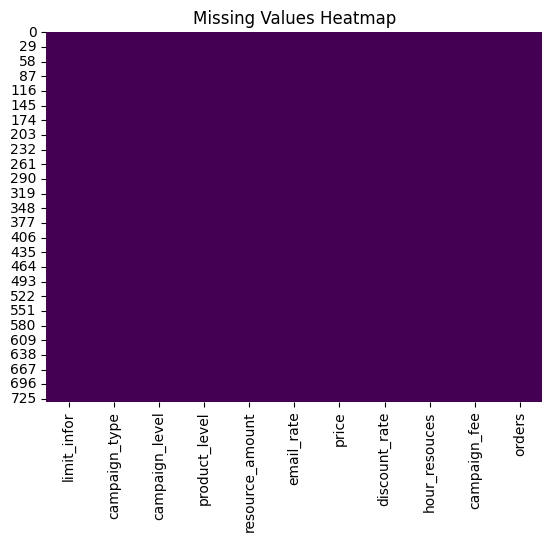

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is already loaded
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()



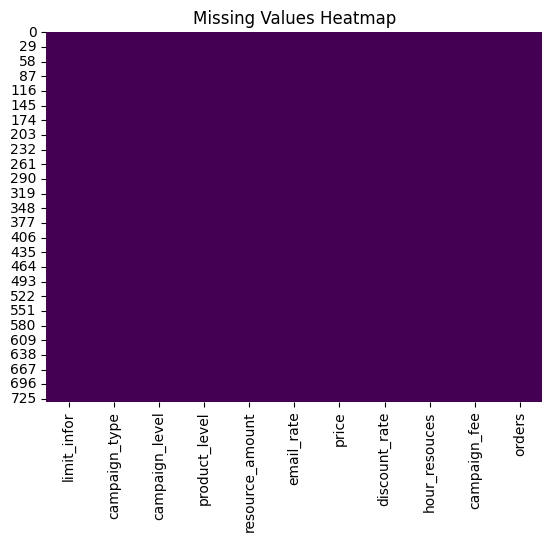

In [13]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


# correlation matrix

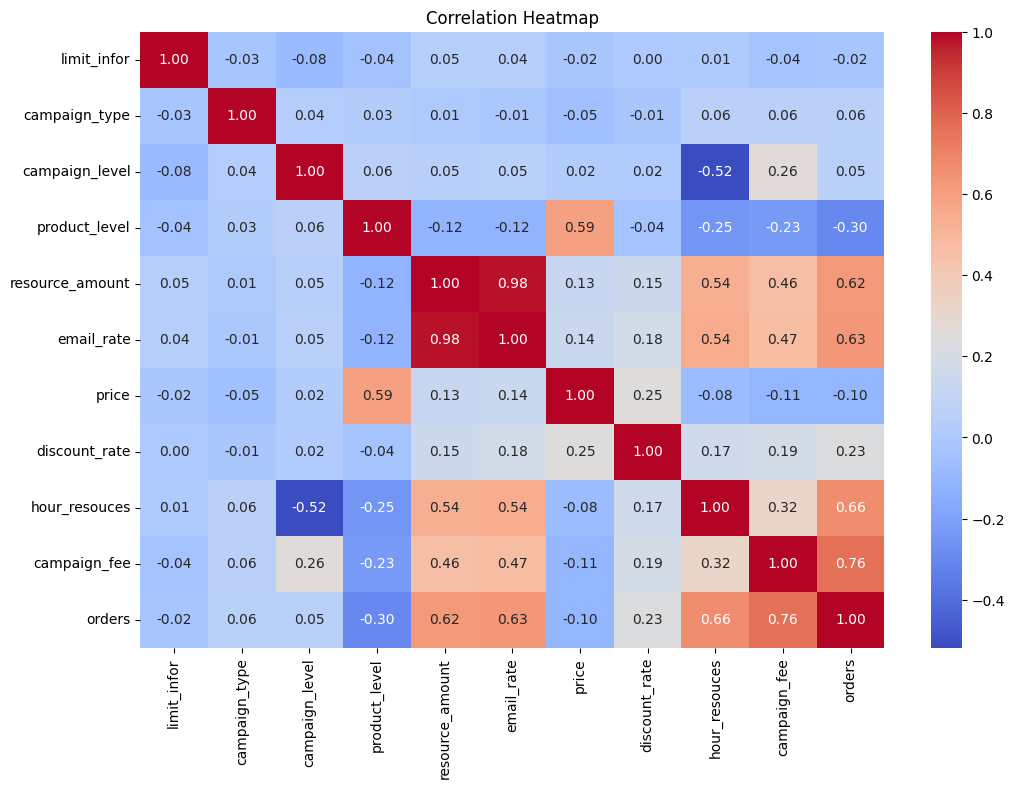

In [14]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


# distribution the target value

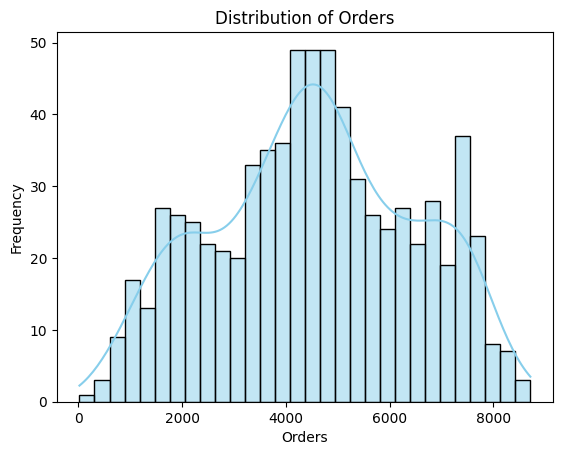

In [15]:
sns.histplot(df['orders'], kde=True, bins=30, color='skyblue')
plt.title("Distribution of Orders")
plt.xlabel("Orders")
plt.ylabel("Frequency")
plt.show()


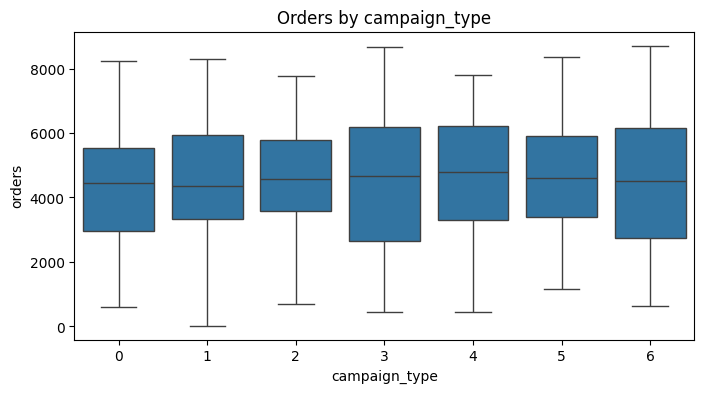

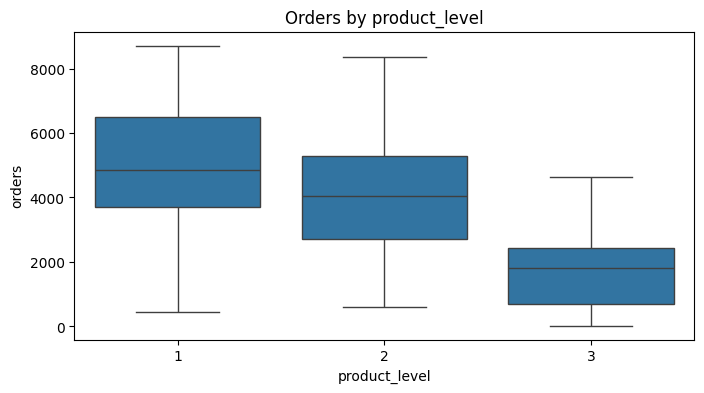

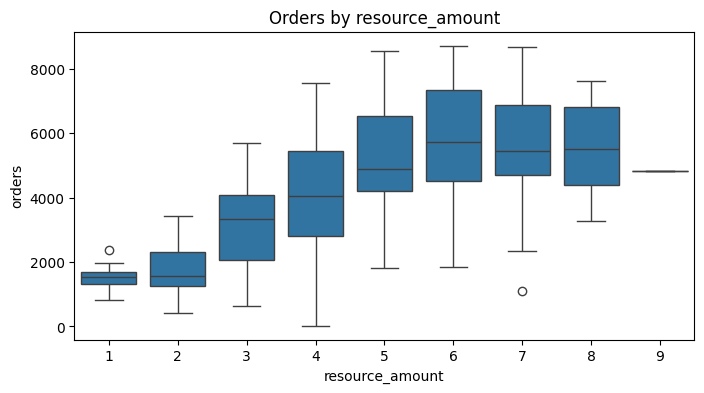

In [16]:
features_to_plot = ['campaign_type', 'product_level', 'resource_amount']

for feature in features_to_plot:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[feature], y=df['orders'])
    plt.title(f"Orders by {feature}")
    plt.show()

# fill missing value

In [17]:
df['price'].fillna(df['price'].median(), inplace=True)

C:\Users\SS\AppData\Local\Temp\ipykernel_15628\1576110267.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['price'].fillna(df['price'].median(), inplace=True)


In [18]:
df.to_csv(r"C:\Users\SS\Downloads\CML_Project\cleaned_products_campaign_sales.csv", index=False)
print("Cleaned dataset saved.")

Cleaned dataset saved.


# FEATURE

In [19]:
X = df.drop('orders', axis=1)
y = df['orders']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# MODEL COMPARISON

In [24]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor()
}

In [30]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_scaled, y_train)

best_model = grid_search.best_estimator_
y_pred_final = best_model.predict(X_test_scaled)

print("\nBest Random Forest Model:")
print("R2 Score:", r2_score(y_test, y_pred_final))

print("Best Params:", grid_search.best_params_)


Best Random Forest Model:
R2 Score: 0.9370199334426491
Best Params: {'max_depth': 10, 'n_estimators': 50}


In [31]:
import joblib

# Save model
joblib.dump(model, 'campaign_model.joblib')

# Load model
loaded_model = joblib.load('campaign_model.joblib')

# Use it
predictions = loaded_model.predict(X_test)


c:\Users\SS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
